# Machine Learning Essentials SS25 - Exercise Sheet 1

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 2: The Perceptron Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
from IPython.display import clear_output

# 1.)

[np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]


Text(0.5, 1.0, 'Data visualisation')

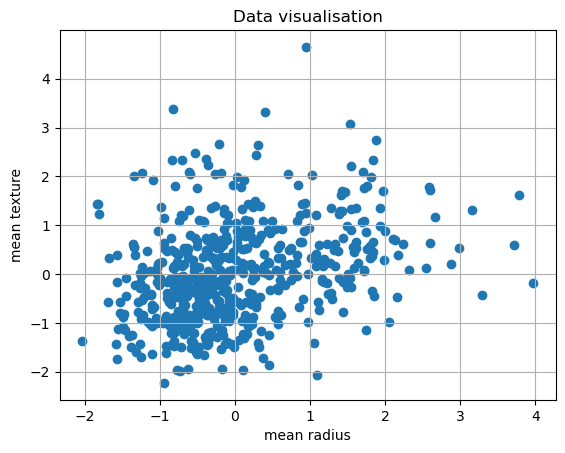

In [4]:
# ===============================
# 1. Load & Visualize the Dataset
# ===============================

# Load dataset, print feature names
data = load_breast_cancer()
print(list(data['feature_names']))

# Select features & corresponding labels
mean_r = data['data'][:,0] # 0 corresponds to the values of the mean radius of the features
mean_t = data['data'][:,1] # 1 corresponds to the values of the mean target of the features
X = np.transpose(np.vstack([mean_r,mean_t])) # for each instance merge the mean radius and texture in one row -> shape = (569,2)
y = data['target'] # the true target -> shape = (569,)

# Convert labels from {0,1} to {-1,1} to match Perceptron convention from sheet
y = 2 * (y - 0.5) 

# Standardize the data to zero mean and unit variance, explain why it's useful
X = StandardScaler().fit(X).transform(X)

# Visualize dataset using plt.scatter()
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.title("Data visualisation")


The Standardization is useful and advantageous for machine learning, because input data whose instances lie somewhat in the same range lead to better convergence rates for gradient descent methods and numerical stability (See: [Why Standardization is Important in Machine Learning](https://medium.com/@jazeem.lk/why-standardization-is-important-in-machine-learning-9b55a9e03d58))

# 2.)

In [6]:
# ========================
# 2. Implement the Perceptron's training algorithm
# ========================

class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = None  # Weights
        self.b = None # Bias
        self.history = [] # Store parameters for decision boundary @ each update for visualization
    
    def train(self, X, y):
        """Train the perceptron using the online Perceptron algorithm."""
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Train for num_epochs iterations
        for e in range(self.num_epochs):
            for i in range(n_samples):
                X_i = X[i]
                # Implement the update rule
                if y[i] != self.predict(X_i):
                    # determine parameter adaptation via gradient descent of ReLU
                    self.w += self.learning_rate * y[i] * X_i
                    self.b += self.learning_rate * y[i]
                    self.history.append((self.w.copy(),self.b)) # Save state for visualization 
                    #(Added .copy() to self.w because otherwise the list was filled the the same w value; this was some sort of referencing problem to a pointer instead of the actual new value)

    def predict(self, X):
        """Predict the label of a sample."""
        # Implement the prediction function
        if (np.dot(self.w,X) + self.b) >= 0:
            return 1
        else:
            return -1

# 3.)


In [9]:
# ========================
# 3. Train the Perceptron & Evaluate Performance
# ========================

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initialize the Perceptron and train it on the training set
perceptron = Perceptron(num_epochs=100)
perceptron.train(X_train, y_train)
# Use the trained Perceptron to compute the accuracy on the training set and on the test set

train_acc = accuracy_score([perceptron.predict(X_train[i]) for i in range(len(X_train[:,0]))],y_train)
test_acc = accuracy_score([perceptron.predict(X_test[i]) for i in range(len(X_test[:,0]))],y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Training Accuracy: 0.866
Test Accuracy: 0.904


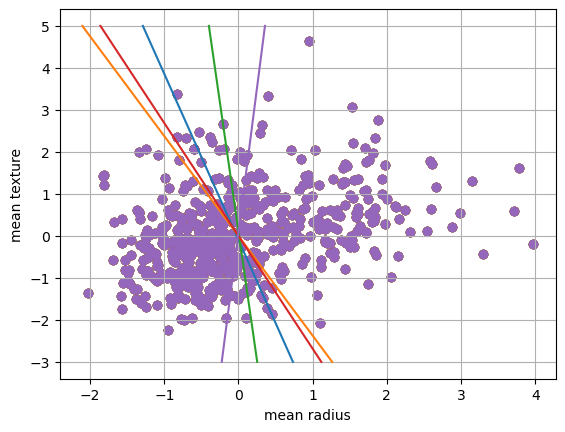

In [ ]:
# ========================
# 4. Plot decision boundary evolution
# ========================

# Visualize the first 5 consecutive decision boundaries for data
decision_boundaries = perceptron.history[:100] # Get the parameters of the first 5 decision boundaries used during training


# Plot decision boundaries for iterations 1-5
def Decision_Boundary(w,b,x):
    ''' Turn a given w and b into a linear function'''
    offset = (-b * w / np.linalg.norm(w))[1] # only taking the x_2 component of the bias of the hyperplane
    gradient = - w[1] / w[0] # the vector that lies in th plane is given by  [w[1],-w[0]]
    return offset + x * gradient

X_1 = np.linspace(-3,5,1000)
for i in range(5):
    clear_output(wait=True)
    plt.plot(Decision_Boundary(decision_boundaries[i][0],decision_boundaries[i][1],X_1),X_1)
    plt.grid(True)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.scatter(X[:,0],X[:,1])

    



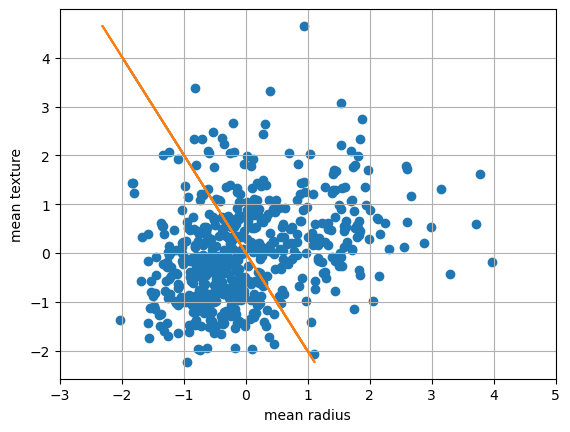

In [ ]:
# Showing evolution visually
for i in range(len(decision_boundaries)):
        clear_output(wait=True)
        plt.plot(Decision_Boundary(decision_boundaries[i][0],decision_boundaries[i][1],X),X)
        plt.grid(True)
        plt.xlim(-3,5)
        plt.scatter(X[:,0],X[:,1])
        plt.xlabel("mean radius")
        plt.ylabel("mean texture")  
        plt.show()


### 5.
TODO: How many updates do you need until convergence (i.e. until no more model updates
occur)? Explain why.


In [ ]:
# ========================
# 6. Evaluate Performance Over Multiple Runs
# ========================

#TODO: Evaluate performance over multiple runs. Compute and store test accuracies


#TODO: Plot histogram for the test accuracies



### (a)
TODO: What does the shape of the histogram tell you?

In [ ]:
# (b)
#TODO: Compute the sample mean and standard deviation of the test accuracy

### (c)
TODO: Given enough data points and for many training runs, what type of probability distribution would the histogram approximate and what is the reason for that?

In [ ]:
# (d)
p_values = [0, 10, 20, 30, 40, 50] # % of flipped training labels
#TODO: Add noise by flipping p% of labels. Visualize the effect using histograms for each p.

TODO: Interpret the results

## Exercise 3: SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from cvxopt import matrix, solvers # Install cvxopt via "pip install cvxopt"

In [ ]:
# ========================
# 1. Complete SVM implementation
# ========================

class DualSVM:
    def __init__(self, C=1.0, kernel="linear", gamma=1.0):
        self.C = C # Regularization constant
        self.kernel = kernel # Kernel type: "linear" or "rbf"
        self.gamma = gamma # Kernel parameter ("bandwith")
        self.alpha = None # Lagrange multipliers
        self.sv_X = None # Support vectors
        self.sv_y = None # Support vector labels
        self.w = None # Weights
        self.b = None # Bias

    def linear_kernel(self, X1, X2):
        #TODO: Implement linear kernel
        return 

    def rbf_kernel(self, X1, X2):
        #TODO: Implement RBF kernel 
        return 

    def compute_kernel(self, X1, X2):
        if self.kernel == "linear":
            return self.linear_kernel(X1, X2)
        elif self.kernel == "rbf":
            return self.rbf_kernel(X1, X2)
        else:
            raise ValueError("Unknown kernel type.")

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute kernel matrix K: K[i,j] = K(x_i, x_j)
        K = self.compute_kernel(X, X)

        """
        The dual objective is:
            max  sum_i alpha_i - 1/2 sum_i sum_j alpha_i alpha_j y_i y_j K(x_i, x_j)
        subject to:
            sum_i alpha_i y_i = 0  and  0 <= alpha_i <= C for all i.
        In QP formulation:
            P = (y_i y_j K(x_i,x_j))_{i,j},   q = -1 (vector),
            A = y^T, b = 0, and G, h implement 0 <= alpha_i <= C.
        """

        # TODO: Use the matrix function of cvxopt to define the QP parameters
        P = matrix()
        q = matrix()
        A = matrix(y, (1, n_samples),"d") # Use "d" flag to make sure that the matrix is in double precision format (labels are integers)
        b = matrix()
        
        
        # TODO: Implement inequality constraints by defining G and h
        G = matrix()
        h = matrix()

        # Solve the QP problem using cvxopt
        solvers.options["show_progress"] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution["x"]) # Get optimal alphas

        # Get support vectors (i.e. data points with non-zero lagrange multipliers, that are on the margin)
        sv = alphas > 1e-5 # alpha > 1e-5 to account for numerical errors
        self.alpha = alphas[sv]
        self.sv_X = X[sv]
        self.sv_y = y[sv]

        # The bias corresponds to the average error over all support vectors:
        # Why does the bias corresponds to the average error over all support vectors?
        # The answer is that the bias is the average of the differences between the true labels and the predicted labels
        # for the support vectors. The predicted labels are computed by the decision function f(x) = sum(alpha_i y_i K(x,x_i)) + b.
        # The difference between the true labels and the predicted labels is the error for each support vector.
        # The bias is the average of these errors.
        self.b = np.mean(self.sv_y - np.sum(self.alpha * self.sv_y * K[sv][:, sv], axis=1))

    def predict(self, X):
        #TODO: Implement the decision function and return the corresponding predicted labels
        return

In [ ]:
# ========================
# 2. Apply linear SVM on blobs
# ========================

# TODO: Generate blobs dataset
X_linear, y_linear = 

# Convert labels from {0,1} to {-1,1}
y_linear = 2 * (y_linear - 0.5) 

#TODO: Train SVM with linear kernel

#TODO: Plot decision boundary


In [ ]:
# ===========================
# 3. Apply linear SVM on circles
# ===========================

#TODO: Generate circles dataset
X_circles, y_circles = 
y_circles = 2 * (y_circles - 0.5)  # Convert labels from {0,1} to {-1,1}

#TODO: Train SVM with linear kernel

#TODO: Plot decision boundary

In [ ]:
# ===========================
# 4. Apply feature transformation 
# ===========================

def transform_features(X):
    # TODO: compute feature transformation: f(x) = [x1, x2, x1^2 + x2^2]
    return 


#TODO: Train SVM with linear kernel on transformed features

def plot_decision_boundary_transformed(X, y, model, title="SVM Decision Boundary (Transformed)"):
    # TODO: Implement plotting function for decision boundary in the transformed feature space
    # Hint: You could do this by creating a 2D meshgrid which you transform using the feature mapping.
    # Then, after evaluating the model on it, you can plot the result as a contour plot (plt.contourf).
    ...
    plt.show()

#TODO: Plot decision boundary in the transformed feature space


In [ ]:
# ===========================
# 5. SVM with RBF Kernel on Circular Data
# ===========================

#TODO: Train SVM with RBF kernel on circular data

#TODO: Plot decision boundary

### 6.

TODO: Compare the decision boundaries from Tasks 3, 4, and 5. How does feature transformation differ from using an RBF kernel? When would one approach be preferable to the other?


### 7. 

TODO: Besides the dual formulation, SVMs also have an equivalent primal formulation. The key factor in choosing which one to use as the optimization criterion is the dimensionality of the features. Explain why.